In [14]:
import numpy as np
from numpy.random import seed
from numpy.random import randint
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import pandas as pd
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
from pprint import pprint
import re
import matplotlib.colors as mcolors
from matplotlib.ticker import MaxNLocator
import nltk
import seaborn as sns
from collections import Counter
nltk.download('stopwords')
from nltk.corpus import stopwords
import funciones as fn
import datetime

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
df = pd.read_excel(r'D:\Trabajo\Barómetro\BX\Facebook\voices_of_venezuela_ene_feb_comments.xlsx')
df

,path,id,parent_id,level,object_id,object_type,object_key,query_status,query_time,query_type,...,status_type,shares.count,comments.summary.total_count,reactions.summary.total_count,like.summary.total_count,love.summary.total_count,haha.summary.total_count,wow.summary.total_count,sad.summary.total_count,angry.summary.total_count
0,319662435565899_1026522048213264,2,1,1,319662435565899_1026522048213264,data,data.*,fetched (200),2022-03-02 01:56:13.906,Facebook:/<page-id>/posts,...,added_video,20.0,46.0,52.0,42.0,0.0,0.0,0.0,3.0,7.0
1,319662435565899_1026522048213264/3196624355658...,49,2,2,319662435565899_1026522048213264,data,data.*,fetched (200),2022-03-02 02:12:22.116,Facebook:/<post-id>/comments,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,319662435565899_1026522048213264/3196624355658...,50,2,2,319662435565899_1026522048213264,data,data.*,fetched (200),2022-03-02 02:12:22.116,Facebook:/<post-id>/comments,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,319662435565899_1026522048213264/3196624355658...,51,2,2,319662435565899_1026522048213264,data,data.*,fetched (200),2022-03-02 02:12:22.116,Facebook:/<post-id>/comments,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,319662435565899_1026522048213264/3196624355658...,52,2,2,319662435565899_1026522048213264,data,data.*,fetched (200),2022-03-02 02:12:22.116,Facebook:/<post-id>/comments,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,319662435565899_1026522048213264/3196624355658...,2367,48,2,319662435565899_981771112688358,data,data.*,fetched (200),2022-03-02 02:13:46.552,Facebook:/<post-id>/comments,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2364,319662435565899_1026522048213264/3196624355658...,2368,48,2,319662435565899_981771112688358,data,data.*,fetched (200),2022-03-02 02:13:46.552,Facebook:/<post-id>/comments,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2365,319662435565899_1026522048213264/3196624355658...,2369,48,2,319662435565899_981771112688358,data,data.*,fetched (200),2022-03-02 02:13:46.552,Facebook:/<post-id>/comments,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2366,319662435565899_1026522048213264/3196624355658...,2370,48,2,319662435565899_981771112688358,data,data.*,fetched (200),2022-03-02 02:13:46.552,Facebook:/<post-id>/comments,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Eliminamos los URL: Todo lo que empieza por  HTTP
df['Clean_Text']=df['message'].replace(r"http\S+", '', regex=True)
#Eliminamos todos los hashtags
df['Clean_Text']=df['Clean_Text'].replace('#\\w+', '', regex=True)
#Eliminamos los signos de puntuación repetidos dentro de los tweets
df['Clean_Text']=df['Clean_Text'].replace(r'([^0-9a-zA-Z])\1+', r'\1', regex=True)
#Eliminamos los signos de puntuación al inicio de un tweet
df['Clean_Text']=df['Clean_Text'].replace(r'^[^0-9a-zA-Z@#]+', '', regex=True)
#Eliminamos los dobles espacios
df['Clean_Text']=df['Clean_Text'].replace(r'()\1+', r'\1\1', regex=True)
#Eliminamos las df repetivas dentro de las palabras
df['Clean_Text']=df['Clean_Text'].replace(r'(.)\1+', r'\1\1', regex=True)
# Quitar las comillas de los textos
df['Clean_Text']=df['Clean_Text'].replace('"', '', regex=True)
# Remover puntuaciones innecesarias
df['Clean_Text'] = df['Clean_Text'].map(lambda x: re.sub('[,\.!?]', '', str(x)))
df['Clean_Text']=df['Clean_Text'].str.replace('RT', '')
# Remover mayúsculas de inicio de texto
df['Clean_Text'] = df['Clean_Text'].map(lambda x: x.lower())
#Autores
df['Clean_Text']=df['Clean_Text'].replace(r'@\w+', '', regex=True)
df['Clean_Text']=df['Clean_Text'].str.replace('rt', '')
#Espacios
df['Clean_Text']=df['Clean_Text'].str.strip()
df['Clean_Text']=df['Clean_Text'].replace('Document_No', '')
# Exclude stopwords 
spanish_stopwords=stopwords.words('spanish')
spanish_stopwords.extend(['ser', 'haber'])
#spanish_stopwords.extend(usuarios)
spanish_stopwords.remove('no')
spanish_stopwords.remove('ni')
df['Clean_Text_no_stopwords'] = df['Clean_Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (spanish_stopwords) and len(word)>1]))

In [9]:
df['Clean_Text_no_stopwords']

0       septiembre hacer nuevamente registro ⁉️ activa...
1       hola voices of venezuela octubre hice registro...
2       puraa mentira 1ero septiembre respuesta superc...
3                                                 octubre
4       hola nani hice botón septiembre miércoles vier...
                              ...                        
2363        hago bajar constancia aprobado porq no podido
2364    hola nany feliz año nuevo hago pa solicitar ca...
2365    si toda familia prenda amarilla alegría maracu...
2366    hola cómo bueno días si tener venezolano sacar...
2367                                                  nan
Name: Clean_Text_no_stopwords, Length: 2368, dtype: object

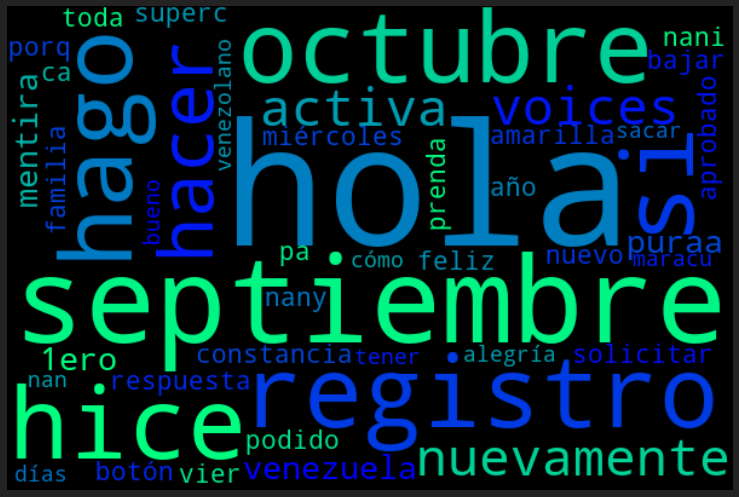

In [10]:
# Word cloud general de todos los posts
series_a_str = str(df["Clean_Text_no_stopwords"])
series_a_str = series_a_str.replace('Document_No', '')
series_a_str = series_a_str.replace('dtype', '')
series_a_str = series_a_str.replace('object', '')
series_a_str = series_a_str.replace('Name', '')
series_a_str = series_a_str.replace('Length', '')
series_a_str = series_a_str.replace('Clean_Text_no_stopwords', '')
# Nube de palabras general
cloud=WordCloud(colormap="winter",width=600,height=400).generate(series_a_str)
fig=plt.figure(figsize=(13,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

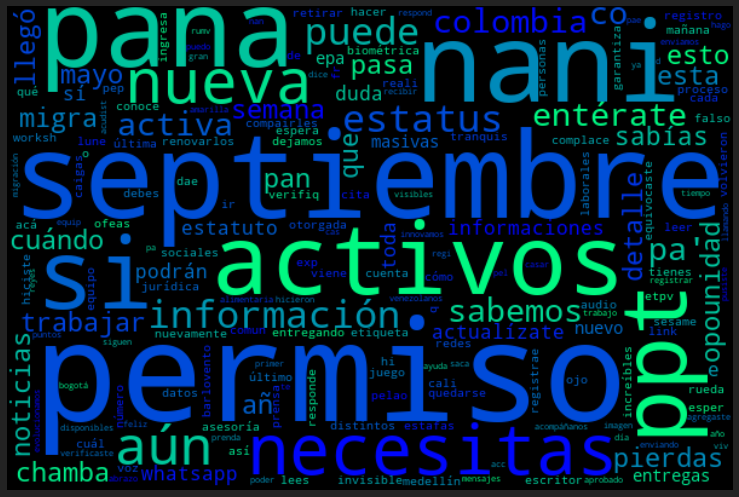

In [11]:
# Word cloud general de los posts de voices of venezuela
df_vv = df[df['level'] == 1]
series_a_str = str(df_vv["Clean_Text_no_stopwords"])
series_a_str = series_a_str.replace('Document_No', '')
series_a_str = series_a_str.replace('dtype', '')
series_a_str = series_a_str.replace('object', '')
series_a_str = series_a_str.replace('Name', '')
series_a_str = series_a_str.replace('Length', '')
series_a_str = series_a_str.replace('Clean_Text_no_stopwords', '')
# Nube de palabras general
cloud=WordCloud(colormap="winter",width=600,height=400).generate(series_a_str)
fig=plt.figure(figsize=(13,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

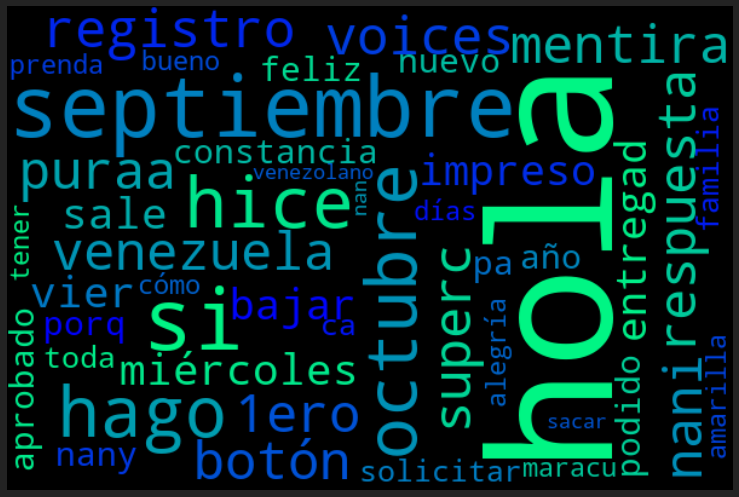

In [12]:
# Word cloud general de los comments hacia voices of venezuela
df_vv = df[df['level'] == 2]
series_a_str = str(df_vv["Clean_Text_no_stopwords"])
series_a_str = series_a_str.replace('Document_No', '')
series_a_str = series_a_str.replace('dtype', '')
series_a_str = series_a_str.replace('object', '')
series_a_str = series_a_str.replace('Name', '')
series_a_str = series_a_str.replace('Length', '')
series_a_str = series_a_str.replace('Clean_Text_no_stopwords', '')
# Nube de palabras general
cloud=WordCloud(colormap="winter",width=600,height=400).generate(series_a_str)
fig=plt.figure(figsize=(13,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

In [20]:
df['fecha'] = df['created_time'].dt.strftime('%d/%m/%Y')
df['fecha']

0       28/02/2022
1       28/02/2022
2       28/02/2022
3       28/02/2022
4       28/02/2022
           ...    
2363    03/01/2022
2364    04/01/2022
2365    05/01/2022
2366    15/02/2022
2367           NaN
Name: fecha, Length: 2368, dtype: object

In [33]:
#from datetime import date, timedelta

#def daterange(start_date, end_date):
#    for n in range(int((end_date - start_date).days)):
#        yield start_date + timedelta(n)

#start_date = date(2022, 1, 1)
#end_date = date(2022, 3, 1) # Y M D
#for single_date in daterange(start_date, end_date):
#    print(single_date.strftime('%d/%m/%Y'))
    

In [41]:
df['mes'] = df['created_time'].dt.month
df['dia'] = df['created_time'].dt.day
df_quincena_1 = df[(df['dia'] <= 15) & (df['mes'] == 1)]
df_quincena_2 = df[(df['dia'] > 15) & (df['mes'] == 1)]
df_quincena_3 = df[(df['dia'] <= 15) & (df['mes'] == 2)]
df_quincena_4 = df[((df['dia'] > 15) & (df['mes'] == 2)) | ((df['dia'] <= 15) & (df['mes'] == 3))]

,path,id,parent_id,level,object_id,object_type,object_key,query_status,query_time,query_type,...,love.summary.total_count,haha.summary.total_count,wow.summary.total_count,sad.summary.total_count,angry.summary.total_count,Clean_Text,Clean_Text_no_stopwords,fecha,mes,dia
0,319662435565899_1026522048213264,2,1,1,319662435565899_1026522048213264,data,data.*,fetched (200),2022-03-02 01:56:13.906,Facebook:/<page-id>/posts,...,0.0,0.0,0.0,3.0,7.0,los de septiembre tienen que hacer nuevamente ...,septiembre hacer nuevamente registro ⁉️ activa...,28/02/2022,2.0,28.0
1,319662435565899_1026522048213264/3196624355658...,49,2,2,319662435565899_1026522048213264,data,data.*,fetched (200),2022-03-02 02:12:22.116,Facebook:/<post-id>/comments,...,NaN,NaN,NaN,NaN,NaN,hola voices of venezuela yo soy de octubre hic...,hola voices of venezuela octubre hice registro...,28/02/2022,2.0,28.0
2,319662435565899_1026522048213264/3196624355658...,50,2,2,319662435565899_1026522048213264,data,data.*,fetched (200),2022-03-02 02:12:22.116,Facebook:/<post-id>/comments,...,NaN,NaN,NaN,NaN,NaN,puraa mentira estoy desde el 1ero de septiembr...,puraa mentira 1ero septiembre respuesta superc...,28/02/2022,2.0,28.0
3,319662435565899_1026522048213264/3196624355658...,51,2,2,319662435565899_1026522048213264,data,data.*,fetched (200),2022-03-02 02:12:22.116,Facebook:/<post-id>/comments,...,NaN,NaN,NaN,NaN,NaN,y lo de octubre,octubre,28/02/2022,2.0,28.0
4,319662435565899_1026522048213264/3196624355658...,52,2,2,319662435565899_1026522048213264,data,data.*,fetched (200),2022-03-02 02:12:22.116,Facebook:/<post-id>/comments,...,NaN,NaN,NaN,NaN,NaN,hola nani yo lo hice en el botón de septiembre...,hola nani hice botón septiembre miércoles vier...,28/02/2022,2.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,319662435565899_1026522048213264/3196624355658...,1015,19,2,319662435565899_1014374882761314,data,data.*,fetched (200),2022-03-02 02:13:15.642,Facebook:/<post-id>/comments,...,NaN,NaN,NaN,NaN,NaN,genis zapata ibarra,genis zapata ibarra,16/02/2022,2.0,16.0
1051,319662435565899_1026522048213264/3196624355658...,1080,21,2,319662435565899_1013105719554897,data,data.*,fetched (200),2022-03-02 02:13:16.814,Facebook:/<post-id>/comments,...,NaN,NaN,NaN,NaN,NaN,luis gabriel perez contrera mira esta información,luis gabriel perez contrera mira información,17/02/2022,2.0,17.0
1052,319662435565899_1026522048213264/3196624355658...,1081,21,2,319662435565899_1013105719554897,data,data.*,fetched (200),2022-03-02 02:13:16.814,Facebook:/<post-id>/comments,...,NaN,NaN,NaN,NaN,NaN,quién ya saco el pase de moto con el ppt,quién saco pase moto ppt,28/02/2022,2.0,28.0
1374,319662435565899_1026522048213264/3196624355658...,1398,27,2,319662435565899_1010309323167870,data,data.*,fetched (200),2022-03-02 02:13:23.795,Facebook:/<post-id>/comments,...,NaN,NaN,NaN,NaN,NaN,hola en el estado me sale impreso pero cuando...,hola sale impreso voy descargar constancia dic...,24/02/2022,2.0,24.0


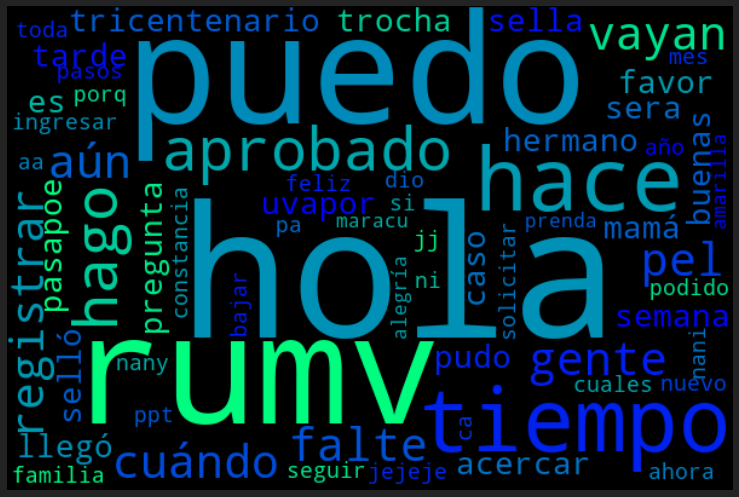

In [42]:
# Word cloud general de la primera quincena
df_vv = df_quincena_1
series_a_str = str(df_vv["Clean_Text_no_stopwords"])
series_a_str = series_a_str.replace('Document_No', '')
series_a_str = series_a_str.replace('dtype', '')
series_a_str = series_a_str.replace('object', '')
series_a_str = series_a_str.replace('Name', '')
series_a_str = series_a_str.replace('Length', '')
series_a_str = series_a_str.replace('Clean_Text_no_stopwords', '')
# Nube de palabras general
cloud=WordCloud(colormap="winter",width=600,height=400).generate(series_a_str)
fig=plt.figure(figsize=(13,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

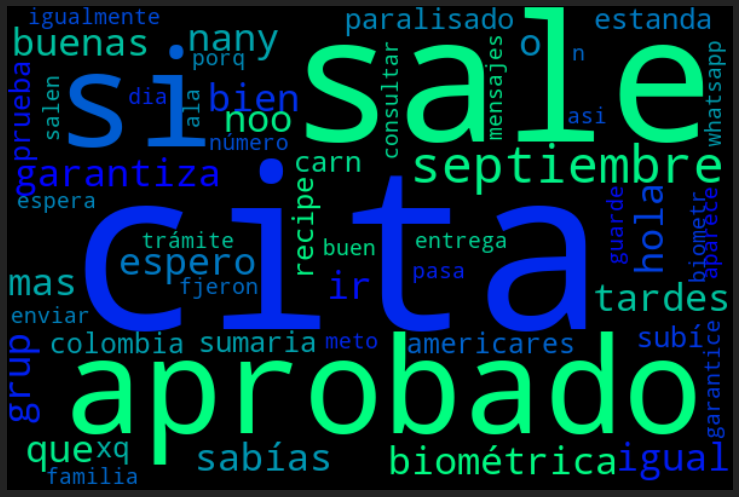

In [43]:
# Word cloud general de la segunda quincena
df_vv = df_quincena_2
series_a_str = str(df_vv["Clean_Text_no_stopwords"])
series_a_str = series_a_str.replace('Document_No', '')
series_a_str = series_a_str.replace('dtype', '')
series_a_str = series_a_str.replace('object', '')
series_a_str = series_a_str.replace('Name', '')
series_a_str = series_a_str.replace('Length', '')
series_a_str = series_a_str.replace('Clean_Text_no_stopwords', '')
# Nube de palabras general
cloud=WordCloud(colormap="winter",width=600,height=400).generate(series_a_str)
fig=plt.figure(figsize=(13,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

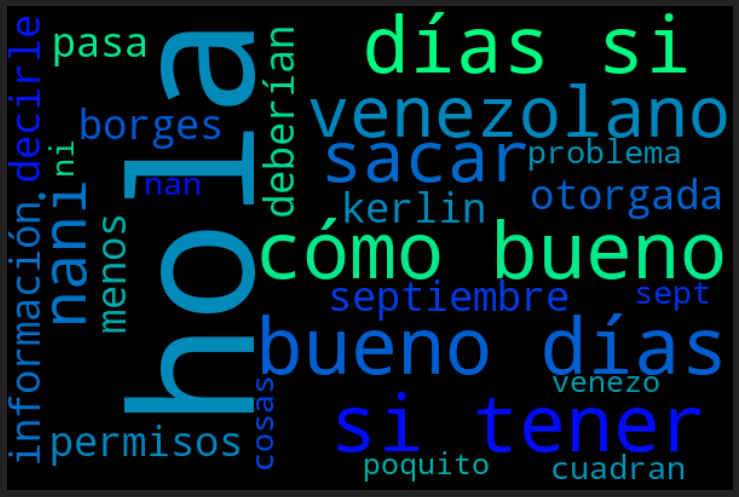

In [44]:
# Word cloud general de la tercera quincena
df_vv = df_quincena_3
series_a_str = str(df_vv["Clean_Text_no_stopwords"])
series_a_str = series_a_str.replace('Document_No', '')
series_a_str = series_a_str.replace('dtype', '')
series_a_str = series_a_str.replace('object', '')
series_a_str = series_a_str.replace('Name', '')
series_a_str = series_a_str.replace('Length', '')
series_a_str = series_a_str.replace('Clean_Text_no_stopwords', '')
# Nube de palabras general
cloud=WordCloud(colormap="winter",width=600,height=400).generate(series_a_str)
fig=plt.figure(figsize=(13,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

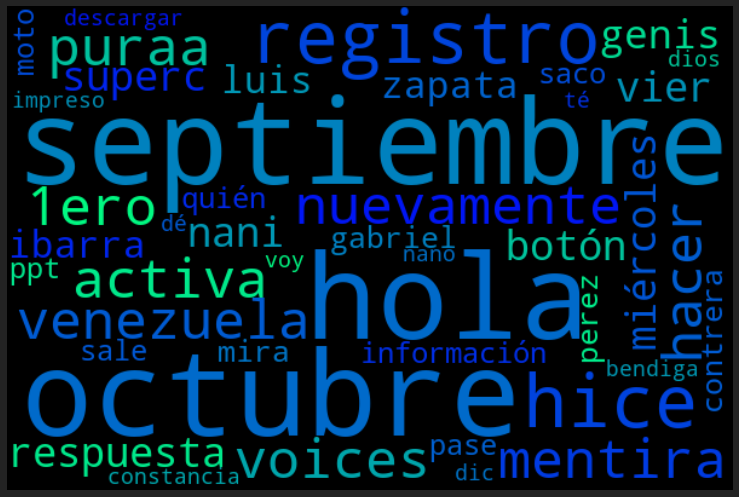

In [45]:
# Word cloud general de la cuarta quincena
df_vv = df_quincena_4
series_a_str = str(df_vv["Clean_Text_no_stopwords"])
series_a_str = series_a_str.replace('Document_No', '')
series_a_str = series_a_str.replace('dtype', '')
series_a_str = series_a_str.replace('object', '')
series_a_str = series_a_str.replace('Name', '')
series_a_str = series_a_str.replace('Length', '')
series_a_str = series_a_str.replace('Clean_Text_no_stopwords', '')
# Nube de palabras general
cloud=WordCloud(colormap="winter",width=600,height=400).generate(series_a_str)
fig=plt.figure(figsize=(13,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')